## Building a simple 2-layer neural network
*Using MNIST Digit dataset*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('Data/MNIST_digit.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split data into training and testing sets

In [11]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T  # transpose matrix
X_test = data_test[1:n]
y_test = data_test[0] 
X_test = X_test / 255.

data_train = data[1000:m].T  # transpose matrix
X_train = data_train[1:n]
y_train = data_train[0]
X_train = X_train / 255.
_,m_train = X_train.shape

#X_train.shape # check the shape of the data

### Creating model parameters and activation functions

In [12]:
def model_parameters():
    W1 = np.random.rand(10, 784) - 0.5  # Input Layer
    b1 = np.random.rand(10, 1) - 0.5  
    W2 = np.random.rand(10, 10) - 0.5 # Output Layer
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    C = np.exp(Z) / sum(np.exp(Z))
    return C

### Defining forward and back propogation

In [13]:
def forward_propogation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2 
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot_encode(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def backward_propogation(Z1, A1, Z2, A2, W1, W2, X, y):
    one_hot_y = one_hot_encode(y)
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


### Update parameters with new weights and biases

In [14]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

### Gradient Descent function

In [18]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size


def gradient_descent(X, y, alpha, iterations):  # where alpha = 'the leanring rate'
    W1, b1, W2, b2 = model_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propogation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propogation(Z1, A1, Z2, A2, W1, W2, X, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 20 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, y))
    return W1, b1, W2, b2

### Train the model

In [19]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.10, 700)  # Learning rate of 0.10 and 500 iterations

Iteration:  0
[3 3 3 ... 6 6 6] [4 0 4 ... 6 4 4]
0.09763414634146342
Iteration:  20
[3 0 2 ... 6 6 6] [4 0 4 ... 6 4 4]
0.2253658536585366
Iteration:  40
[6 0 6 ... 6 7 6] [4 0 4 ... 6 4 4]
0.3064878048780488
Iteration:  60
[6 0 7 ... 6 4 6] [4 0 4 ... 6 4 4]
0.37909756097560976
Iteration:  80
[6 0 4 ... 6 4 9] [4 0 4 ... 6 4 4]
0.44851219512195123
Iteration:  100
[6 0 4 ... 6 4 9] [4 0 4 ... 6 4 4]
0.5042926829268293
Iteration:  120
[6 0 4 ... 6 4 4] [4 0 4 ... 6 4 4]
0.5483902439024391
Iteration:  140
[6 0 4 ... 6 4 4] [4 0 4 ... 6 4 4]
0.5859268292682926
Iteration:  160
[6 0 4 ... 6 4 4] [4 0 4 ... 6 4 4]
0.6176585365853658
Iteration:  180
[6 0 4 ... 6 4 4] [4 0 4 ... 6 4 4]
0.6449268292682927
Iteration:  200
[6 0 4 ... 6 4 4] [4 0 4 ... 6 4 4]
0.667
Iteration:  220
[6 0 4 ... 6 4 4] [4 0 4 ... 6 4 4]
0.687219512195122
Iteration:  240
[6 0 4 ... 6 4 4] [4 0 4 ... 6 4 4]
0.7042926829268292
Iteration:  260
[6 0 4 ... 6 4 4] [4 0 4 ... 6 4 4]
0.7216585365853658
Iteration:  280
[6 0 4 

### Model predictions
*Using training dataset*

In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def compare_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", int(prediction))
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  4
Label:  4


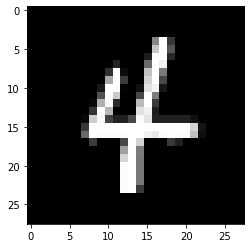

Prediction:  0
Label:  0


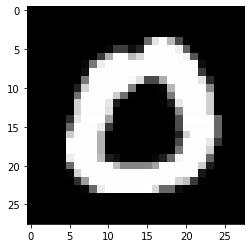

Prediction:  4
Label:  4


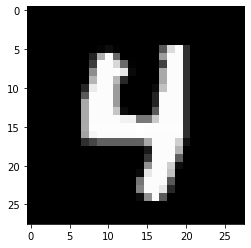

Prediction:  7
Label:  7


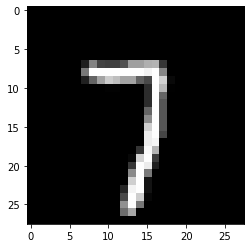

In [29]:
compare_prediction(0, W1, b1, W2, b2)
compare_prediction(1, W1, b1, W2, b2)
compare_prediction(2, W1, b1, W2, b2)
compare_prediction(3, W1, b1, W2, b2)

### Testing the model
*Using testing dataset*

In [42]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
print("\nModel Accuracy: " + str(get_accuracy(test_predictions, y_test)))

[2 6 7 5 3 1 0 3 2 1 6 3 1 4 1 0 6 2 6 0 0 1 6 7 4 3 7 9 7 0 5 1 8 4 2 5 8
 0 7 2 9 0 7 9 4 7 7 5 4 1 9 6 6 2 9 2 7 3 8 5 0 0 8 1 5 6 8 1 1 0 4 7 1 4
 5 0 1 4 3 8 1 9 7 8 1 4 0 3 0 3 8 0 7 5 8 8 3 9 7 8 6 1 0 6 4 4 1 9 3 0 2
 2 7 0 0 4 2 4 9 3 9 9 1 4 8 9 0 8 1 9 9 7 9 4 2 8 6 7 1 4 4 0 5 8 9 3 7 3
 5 3 0 2 5 0 8 3 2 1 2 1 1 6 3 9 3 4 4 6 5 0 6 0 5 6 0 1 1 5 0 8 3 7 6 6 4
 0 0 7 4 2 0 5 8 5 2 6 7 6 5 3 8 1 2 4 3 7 5 0 0 5 7 9 6 9 2 7 4 7 1 4 9 9
 1 2 7 6 9 6 7 5 4 6 4 3 6 4 8 1 5 5 6 5 9 7 7 4 4 1 7 3 3 3 7 4 4 9 0 6 9
 2 9 0 1 1 3 5 5 2 8 8 4 6 8 7 9 9 9 3 7 3 8 4 3 5 8 5 8 3 0 9 9 3 4 6 5 3
 0 3 2 8 3 6 3 8 8 0 3 6 2 6 5 7 4 8 6 3 1 5 9 4 2 1 7 0 8 9 0 6 8 2 8 7 5
 6 1 9 9 8 0 7 4 2 0 5 7 9 5 9 9 5 4 0 6 0 1 5 8 0 4 2 1 1 2 9 2 7 2 7 4 6
 3 8 9 1 8 5 5 0 0 9 0 1 7 5 4 8 7 2 6 5 6 1 2 1 4 1 9 7 2 9 9 7 6 7 6 0 3
 1 8 1 1 0 8 7 9 8 7 3 0 1 1 9 9 1 0 8 0 9 6 3 8 4 1 7 8 7 2 2 8 6 9 9 4 1
 1 3 9 1 4 4 1 9 1 1 9 2 9 9 7 4 3 6 3 8 5 6 4 2 2 6 9 8 5 5 0 1 9 9 9 9 9
 4 3 5 9 4 7 1 7 1 7 7 4 